In [2]:
import matplotlib.pyplot as plt

In [3]:
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [4]:
SPX = obb.derivatives.options.chains(symbol="SPX", provider='cboe')
SPX.head()

,underlying_symbol,underlying_price,contract_symbol,expiration,dte,strike,option_type,open_interest,volume,theoretical_price,...,low,prev_close,change,change_percent,implied_volatility,delta,gamma,theta,vega,rho
0,SPXW,6000.1099,SPXW241113C02400000,2024-11-13,0,2400.0,call,0,3,3601.0481,...,3593.00,3589.799927,3.2001,0.000891,0.0,1.0,0.0,0.0,0.0001,0.0033
1,SPXW,6000.1099,SPXW241113P02400000,2024-11-13,0,2400.0,put,77,3,0.0000,...,0.05,0.025000,0.0250,1.000000,0.0,0.0,0.0,0.0,0.0000,0.0000
2,SPXW,6000.1099,SPXW241113C02600000,2024-11-13,0,2600.0,call,0,0,3401.0481,...,0.00,3389.549927,0.0000,0.000000,0.0,1.0,0.0,0.0,0.0001,0.0033
3,SPXW,6000.1099,SPXW241113P02600000,2024-11-13,0,2600.0,put,44,0,0.0000,...,0.00,0.025000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0000
4,SPXW,6000.1099,SPXW241113C02800000,2024-11-13,0,2800.0,call,0,0,3201.0481,...,0.00,3189.500000,0.0000,0.000000,0.0,1.0,0.0,0.0,0.0001,0.0033


In [6]:
SPX = SPX[SPX['gamma'] * SPX['open_interest'] != 0 ]
SPX

,underlying_symbol,underlying_price,contract_symbol,expiration,dte,strike,option_type,open_interest,volume,theoretical_price,...,low,prev_close,change,change_percent,implied_volatility,delta,gamma,theta,vega,rho
222,SPXW,6000.1099,SPXW241113C05795000,2024-11-13,0,5795.0,call,128,5,206.0732,...,207.41,196.450005,10.960,0.055790,2.5416,0.9987,0.0001,-0.0250,0.0015,0.0021
223,SPXW,6000.1099,SPXW241113P05795000,2024-11-13,0,5795.0,put,154,0,0.0250,...,0.00,0.125000,0.000,0.000000,1.9661,-0.0013,0.0001,-0.0250,0.0015,0.0000
224,SPXW,6000.1099,SPXW241113C05800000,2024-11-13,0,5800.0,call,86,62,201.0732,...,172.64,191.450005,3.970,0.020737,2.1936,0.9986,0.0001,-0.0250,0.0016,0.0020
225,SPXW,6000.1099,SPXW241113P05800000,2024-11-13,0,5800.0,put,3900,108,0.0250,...,0.05,0.125000,-0.075,-0.600000,1.9215,-0.0014,0.0001,-0.0250,0.0016,0.0000
226,SPXW,6000.1099,SPXW241113C05805000,2024-11-13,0,5805.0,call,15,0,196.0732,...,0.00,186.450005,0.000,0.000000,2.1438,0.9986,0.0001,-0.0250,0.0016,0.0020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25748,SPX,6000.1099,SPX291221C09400000,2029-12-21,1864,9400.0,call,5,0,226.9823,...,0.00,220.150002,0.000,0.000000,0.1375,0.2572,0.0002,-0.1222,42.2264,64.6284
25750,SPX,6000.1099,SPX291221C09600000,2029-12-21,1864,9600.0,call,54,0,192.8981,...,0.00,188.250000,0.000,0.000000,0.1353,0.2295,0.0002,-0.1146,39.8332,58.0892
25751,SPX,6000.1099,SPX291221P09600000,2029-12-21,1864,9600.0,put,1,0,2088.2629,...,0.00,2114.899902,0.000,0.000000,0.1368,-0.8058,0.0002,0.0000,39.8332,-344.3130
25752,SPX,6000.1099,SPX291221C10000000,2029-12-21,1864,10000.0,call,3769,0,139.3193,...,0.00,133.700005,0.000,0.000000,0.1310,0.1809,0.0002,-0.0992,34.8771,46.4340


In [8]:
SPX['call_gex'] = SPX.apply(lambda row : row['gamma'] * row['open_interest'] * (row['underlying_price'] ** 2) / 100 if row['option_type'] == 'call' else 0 , axis=1)  
SPX['put_gex'] = SPX.apply(lambda row : -row['gamma'] * row['open_interest'] * (row['underlying_price'] ** 2) / 100 if row['option_type'] == 'put' else 0, axis=1)

In [9]:
SPX['net_gex']= SPX['call_gex'] + SPX['put_gex']

In [10]:
# Group by strike price and aggregate GEX values
gex_by_strike = SPX.groupby('strike').agg(
    call_gex=('call_gex', 'sum'),
    put_gex=('put_gex', 'sum'),
    net_gex=('net_gex', 'sum')
).reset_index()


In [11]:
gex_by_strike

,strike,call_gex,put_gex,net_gex
0,3900.0,1.396851e+04,-6.825850e+04,-5.428999e+04
1,3925.0,0.000000e+00,-6.228228e+03,-6.228228e+03
2,3950.0,0.000000e+00,-5.688208e+03,-5.688208e+03
3,3975.0,0.000000e+00,-4.320158e+02,-4.320158e+02
4,4000.0,6.110360e+06,-6.994372e+06,-8.840124e+05
...,...,...,...,...
437,9000.0,1.274807e+05,-6.840251e+02,1.267966e+05
438,9200.0,1.035110e+06,-7.308268e+03,1.027802e+06
439,9400.0,1.116041e+03,0.000000e+00,1.116041e+03
440,9600.0,9.360343e+03,-1.440053e+02,9.216338e+03


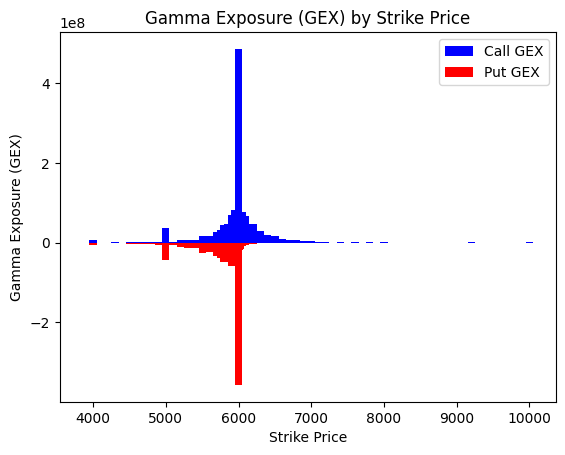

In [14]:
# Overlay Call and Put GEX
plt.bar(gex_by_strike['strike'], gex_by_strike['call_gex'], color='blue', width=100, label='Call GEX')
plt.bar(gex_by_strike['strike'], gex_by_strike['put_gex'], color='red', width=100, label='Put GEX')
# Set x-axis limits to focus on the range with significant values
#plt.xlim([18000, 25000])  # Adjust as necessary based on your data range
plt.xlabel("Strike Price")
plt.ylabel("Gamma Exposure (GEX)")
plt.title("Gamma Exposure (GEX) by Strike Price")
plt.legend()
plt.show()

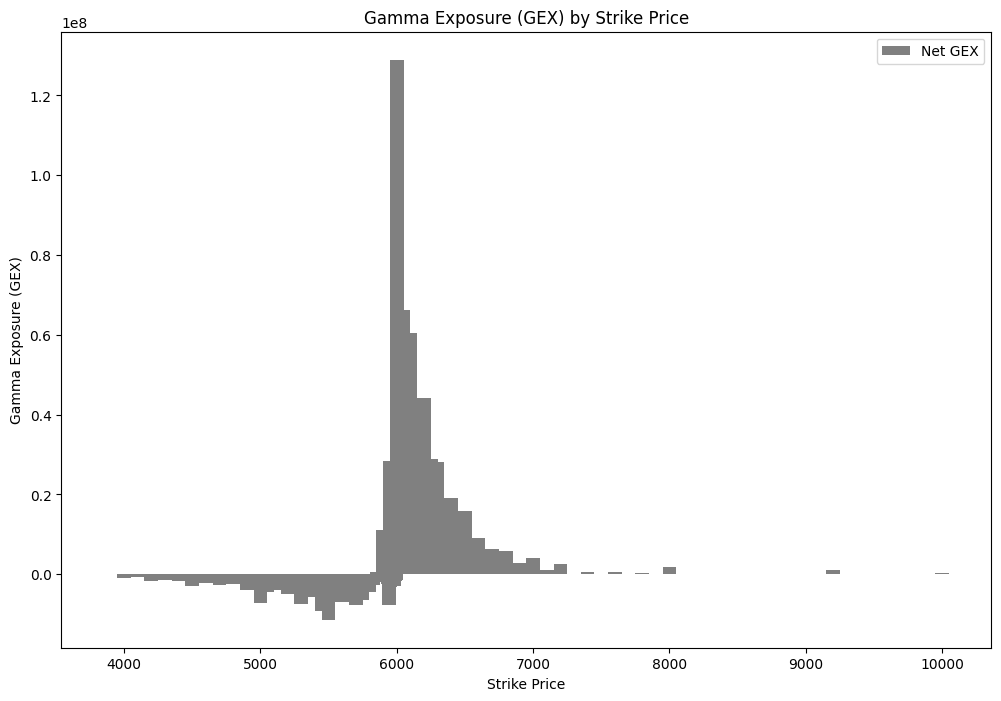

In [15]:
plt.figure(figsize=(12, 8))

# Plot Net GEX
plt.bar(gex_by_strike['strike'], gex_by_strike['net_gex'], color='gray', width=100, label='Net GEX')
# Set x-axis limits to focus on the range with significant values
#plt.xlim([18000, 25000])  # Adjust as necessary based on your data range
plt.xlabel("Strike Price")
plt.ylabel("Gamma Exposure (GEX)")
plt.title("Gamma Exposure (GEX) by Strike Price")
plt.legend()
plt.show()